In [11]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import scipy as sc
from scipy.stats import invgamma

In [12]:
def random_matrix(shape):
    A = np.random.rand(shape[0], shape[1])*50
    return A

def random_integer_matrix(shape):
    return np.floor(random_matrix(shape))

138.430997671 60.8595704834 (112, 92)


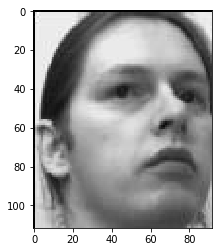

In [13]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

im = Image.open("image/umist_cropped.jpg")
data_orig = np.array(im)
# print(data_orig.shape)
# print(np.mean(data_orig), np.std(data_orig))

ws = (112,92)
data = data_orig[ws[0]:2*ws[0],ws[1]:ws[1]*2]
print(np.mean(data), np.std(data), data.shape)
plt.imshow(data, cmap='gray')
plt.show()

In [4]:
#Gibbs
X = data
I = 20
print(np.mean(X), np.std(X))

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5
#print(data_mean, data_variance)

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale
print(gamma_scale, gamma_shape)

138.430997671 60.8595704834
3.34452487317 0.827806656672


In [56]:
def gibbs(X, gamma_shape, gamma_scale, max_iter):
    F = X.shape[0]
    N = X.shape[1]
    I = 20
    A_t = np.ones((F,I))*gamma_shape
    B_t = np.ones((F,I))*gamma_scale
    A_v = np.ones((I,N))*gamma_shape
    B_v = np.ones((I,N))*gamma_scale
    
    W = invgamma.rvs(A_t,B_t)
    H = invgamma.rvs(A_v,B_v)
    print(np.mean(X), np.std(X))
    print(np.mean(np.dot(W,H)), np.std(np.dot(W,H)))
    
    print("F=%d N=%d"%(F,N))
    for n in range(max_iter):
        
        for k in range(I):
#             mu = np.dot(W[:,[k]],H[[k],:])
            X_head = np.einsum('ik,kj->ij',W,H)
            mat = np.dot(W[:,[k]],H[[k],:])
            mu = (mat/X_head)*X
#             print(mu.shape, np.einsum('ik,kj->ij',W,H).shape ,np.mean(mu))
            sigma = (mat*(X_head-mat))/X_head 

            C_k = np.random.normal(mu, sigma)
#             print(C_k.shape)
            
#             print(B_v.shape ,((np.sum(C_k*C_k/W[:,[k]], axis=0,keepdims=True))).shape)
            W = invgamma.rvs(A_t + N, B_t + (np.sum(C_k*C_k/H[[k],:], axis=1,keepdims=True)))
            H = invgamma.rvs(A_v + F, B_v + (np.sum(C_k*C_k/W[:,[k]], axis=0,keepdims=True)))

#         alpha_t = A_t + np.sum(S, axis=2)
#         #beta_t = 1./(A_t/B_t + np.ones((W,1)).dot(V.dot(np.ones((K,1))).T))
#         beta_t = 1./(B_t + np.ones((W,1)).dot(V.dot(np.ones((K,1))).T));

#         alpha_v = A_v + np.sum(S, axis=0)
#         #beta_v = 1./(A_v/B_v + np.dot(np.ones((W,1)).T.dot(T).T, np.ones((K,1)).T))
#         beta_v = 1./(B_v + np.dot(np.ones((W,1)).T.dot(T).T, np.ones((K,1)).T))

#         T = np.random.gamma(alpha_t, beta_t)
#         V = np.random.gamma(alpha_v, beta_v)

#         if n % 50 == 0:
#             mean_diff = np.mean(np.abs(X - np.dot(T,V)))
#             print("epoch %d: loss: "%n, mean_diff)
    return W, H


T, V = gibbs(X, 100, 1, 1)

138.430997671 60.8595704834
20.40514329 0.00661475421525
F=112 N=92


/Users/yusufhakankalayci/hkn/deep_learning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/Users/yusufhakankalayci/hkn/deep_learning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


ValueError: scale < 0

epoch 0: loss:  135.101447096


KeyboardInterrupt: 

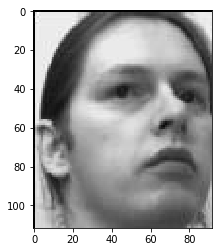

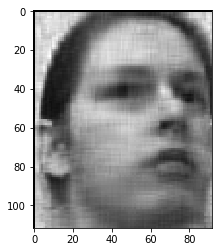

In [7]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()

In [8]:
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

138.430997671 60.8595704834
137.642610476 59.7147979705
